# Kernel SVM

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset

dataset = pd.read_csv(r'C:\Users\aryob\Documents\Bilquiss College\Machine Learning A-Z; AI, Python & R\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\Part 3 - Classification\Section 17 - Kernel SVM\Python\Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [4]:
print(X_train)

[[    20  49000]
 [    46  88000]
 [    31  34000]
 [    47  30000]
 [    35  50000]
 [    39  96000]
 [    33 113000]
 [    49  86000]
 [    45  79000]
 [    44  39000]
 [    41  59000]
 [    42  53000]
 [    35  73000]
 [    41  72000]
 [    27  96000]
 [    30 116000]
 [    41  52000]
 [    41  52000]
 [    20  82000]
 [    46  41000]
 [    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  1500

In [5]:
print(y_train)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0]


In [6]:
print(X_test)

[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [    36  52000]
 [    58  9500

In [7]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0]


In [8]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-1.68062015e+00 -5.92416706e-01]
 [ 8.69241193e-01  5.63566526e-01]
 [-6.01832657e-01 -1.03702564e+00]
 [ 9.67312783e-01 -1.15558802e+00]
 [-2.09546297e-01 -5.62776110e-01]
 [ 1.82740063e-01  8.00691292e-01]
 [-4.05689477e-01  1.30458142e+00]
 [ 1.16345596e+00  5.04285335e-01]
 [ 7.71169603e-01  2.96801165e-01]
 [ 6.73098013e-01 -8.88822663e-01]
 [ 3.78883243e-01 -2.96010749e-01]
 [ 4.76954833e-01 -4.73854323e-01]
 [-2.09546297e-01  1.18957591e-01]
 [ 3.78883243e-01  8.93169951e-02]
 [-9.94119017e-01  8.00691292e-01]
 [-6.99904247e-01  1.39350321e+00]
 [ 3.78883243e-01 -5.03494919e-01]
 [ 3.78883243e-01 -5.03494919e-01]
 [-1.68062015e+00  3.85722952e-01]
 [ 8.69241193e-01 -8.29541472e-01]
 [-9.94119017e-01 -1.12594743e+00]
 [-2.09546297e-01  5.96763994e-02]
 [ 1.16345596e+00 -1.21486922e+00]
 [-2.09546297e-01  6.52488313e-01]
 [-1.34031173e-02  1.78238782e-01]
 [-5.03761067e-01  1.42314380e+00]
 [-1.11474707e-01  1.78238782e-01]
 [-1.68062015e+00  5.04285335e-01]
 [ 8.46684727e-02 -5

In [10]:
print(X_test)

[[-0.11147471 -1.06666624]
 [ 0.18274006 -0.23672956]
 [-0.11147471  1.4527844 ]
 [ 0.18274006  1.57134678]
 [-1.09219061  1.4527844 ]
 [ 0.08466847 -0.11816717]
 [-1.68062015 -0.97774445]
 [ 1.16345596  0.59320712]
 [-0.60183266 -1.51127517]
 [ 1.06538437  2.1345181 ]
 [-0.30761789  0.089317  ]
 [ 0.18274006  0.11895759]
 [-0.2095463   0.089317  ]
 [ 1.06538437  1.83811214]
 [ 1.55574232  0.38572295]
 [ 1.84995709  1.89739333]
 [ 2.24224345  0.41536355]
 [-0.99411902 -0.32565134]
 [-0.89604743  0.53392593]
 [ 2.24224345  0.97853487]
 [ 0.28081165  0.17823878]
 [ 1.26152755  0.56356653]
 [ 0.67309801  2.07523691]
 [ 0.96731278 -0.77026028]
 [ 0.7711696  -1.27415041]
 [-1.09219061 -1.60019696]
 [ 2.04610027 -0.6516979 ]
 [ 1.16345596  0.14859819]
 [ 1.55574232 -1.03702564]
 [ 1.45767073  1.33422201]
 [ 0.18274006 -0.79990088]
 [-1.77869174  0.20787938]
 [-1.87676333  0.50428533]
 [ 1.94802868  0.14859819]
 [-0.99411902  0.44500414]
 [-0.69990425  0.32644176]
 [-1.48447697 -1.51127517]
 

In [11]:
# Training the Kernel SVM model on the Training set

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [12]:
# Predicting a new result

print(classifier.predict(sc.transform([[30, 87000]])))

[0]


In [13]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [14]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49  9]
 [ 3 39]]


0.88

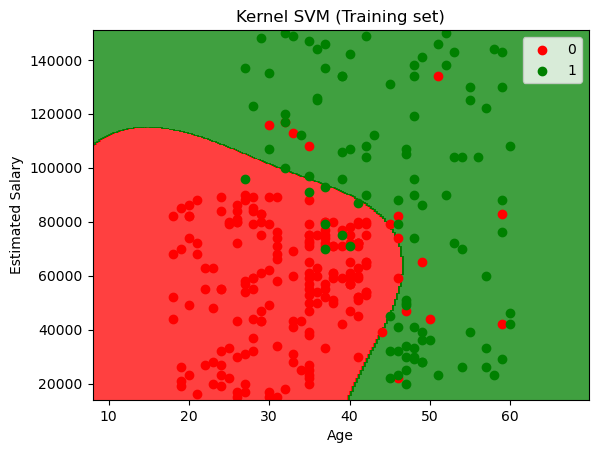

In [15]:
# Visualizing the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Update plt.scatter() to use color instead of c
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

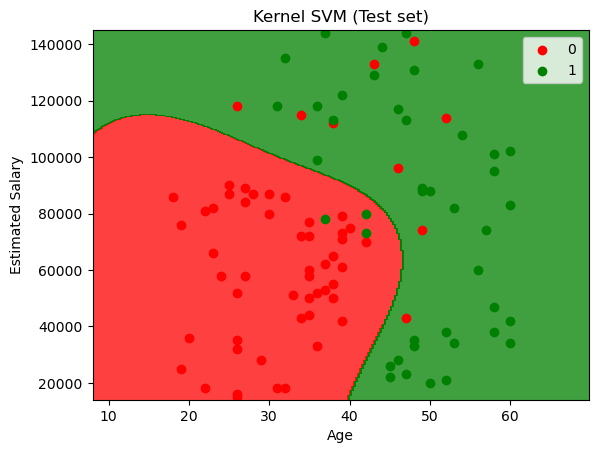

In [16]:
# Visualizing the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Update plt.scatter() to use color instead of c
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# As we can see, the Kernel SVM has made better predictions with the same data compared to the standard SVM. 
#     The reason Kernel SVM is often better is that while a regular SVM works well for simple data that can 
#     be separated by a straight line, it struggles with more complex data. Kernel SVM uses a "kernel" trick 
#     to transform the data into a higher dimension, allowing it to find patterns in data that aren’t linearly 
#     separable. This enables Kernel SVM to handle more complex classification tasks and make more accurate 
#     predictions, especially when the data has non-linear relationships.